# Chapter 3

## Precision and Recall
The confusion matrix is a good way to evaluate the performance of a classifier. There are four classes in the confusion matrix: true positive, false positive, false negative, true negative. Each row in a confusion matrix represents an *actual class*(positive and negative), and each column represents a *predicted class*(true and false). 

$$Precision=\frac{TP}{TP+FP}$$

$$Recall=\frac{TP}{TP+FN}$$

$$F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}=\frac{2PR}{P+R}$$

### Precision versus recall
The F1 score favors classifiers that have similar precision and recall. This is not always the case: in some contexts precision matters, and in other contexts recall matters. 
One way to select a good precision/recall tradeoff is to plot the *precision/recall curve*.

Another way is to use *the ROC curve*(the receiver operating characteristic). Instead of plotting precision versus recall, the ROC curve plots the true positive rate(recall) against the false positive rate(1 - true negative rate). The TNR is also called *specificity*, which is the ratio of negative instances that are correctly classified as negative. Hence the ROC curve plots sensitivity(recall) versus 1 - specificity.

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [4]:
X, y = mnist["data"], mnist["target"]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


import numpy as np
np.random.seed(42)


shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

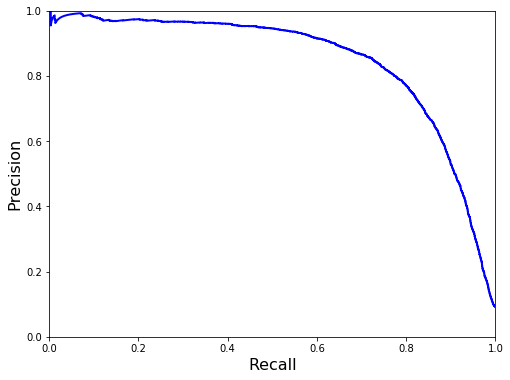

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

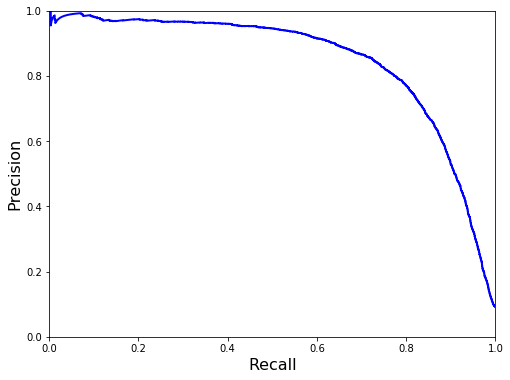

In [12]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

In [10]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

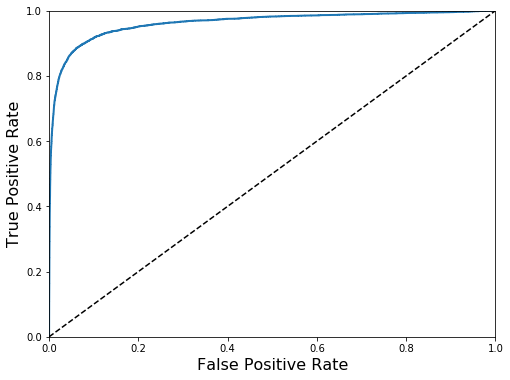

In [11]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

One way to compare classifiers is to measure the *area under the curve*(AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

## Multiclass Classification

Multiclass classifiers can distinguish between more than two classes.  
Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector classifiers or linear classifiers) are strictly binary classifiers. 

### OvA

One way is to create a system with multiple binary classifiers. Then get the decision score from each classifier and select the class whose classifier outputs the highest score. This is called the *one-versus-all* (OVA) strategy (also called *one-versus-the-rest*).

### OvO

Another way is to train a binary classifier for every pair of possible classes. E.g., for digit recognition, one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. If there are *N* classes, you need to train `N*(N-1)/2` classifers. Then just see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

## Multilabel Classification

In some cases you may want the classifier to output multiple classes for each instance. Such a classification system that outputs multiple binary labels is called a *multilabel classification* system

## Multioutput Classification

*Multiclass classification* is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).